<a href="https://colab.research.google.com/github/jagalindo/SPLC23-LLM-artefact/blob/main/SPLC'23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is an implementation of the process we followed to perform the experimentation for tht experiments presented in the paper submitted to SPLC'23.

Concretely, we followed the experiments presented in tthe steps we followed were:


# Enviroment preparation

In [ ]:
!apt install git


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


# First step: Feature model crawling and adapting

**First, we download all SPLOT feature models. For that we rely on a repository that is updated to the date of publishing this paper.** This repo also have the API calls we made when Codex was available

In [ ]:
!rm -rf SPLC23-LLM-artefact/
!git clone https://github.com/jagalindo/SPLC23-LLM-artefact.git

Cloning into 'SPLC23-LLM-artefact'...
remote: Enumerating objects: 1828, done.
remote: Counting objects: 100% (1828/1828), done.
remote: Compressing objects: 100% (380/380), done.
remote: Total 1828 (delta 1471), reused 1796 (delta 1442), pack-reused 0
Receiving objects: 100% (1828/1828), 2.16 MiB | 13.16 MiB/s, done.
Resolving deltas: 100% (1471/1471), done.


Prepare the enviroment by installing Flama

In [ ]:
!pip install flamapy flamapy-fm flamapy-sat flamapy-bdd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of flamapy-bdd to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of flamapy-bdd to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of flamapy-sat to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9


From FamaXML format to UVL



In [ ]:
from flamapy.core.discover import DiscoverMetamodels # This loads the tool in the python execution environment
import os
dm = DiscoverMetamodels() # Instantiate the class

FAMAXML_INPUT_DIRECTORY = './SPLC23-LLM-artefact/1.model_selection/1.all_splot_in_fama_xml/'
UVL_OUTPUT_DIRECTORY = './SPLC23-LLM-artefact/1.model_selection/2.all_splot_in_uvl/'

for filename in os.listdir(FAMAXML_INPUT_DIRECTORY):
    f = os.path.join(FAMAXML_INPUT_DIRECTORY, filename)
    if os.path.isfile(f):
        model=dm.use_transformation_t2m(f,"fm") # Use the transformation to translate the model
        dm.use_transformation_m2t(model,UVL_OUTPUT_DIRECTORY+filename.replace(".xml",".uvl"))

Now that we have the models in UVL, let's list them


In [ ]:
!ls -a ./SPLC23-LLM-artefact/1.model_selection/2.all_splot_in_uvl/

.			       model_20150411_1026005127.uvl
..			       model_20150411_1055039600.uvl
aircraft_fm.uvl		       model_20150411_1378086632.uvl
arcade_game_pl_fm.uvl	       model_20150414_2125272166.uvl
car_fm.uvl		       model_20150416_264061404.uvl
cfdp_library_fm.uvl	       model_20150419_1225785874.uvl
connector_fm.uvl	       model_20150423_1415525319.uvl
DELL-LAPTOP-NOTEBOOK-FM.uvl    model_20150423_1422172417.uvl
__empty__		       model_20150425_1862491910.uvl
fame_dbms_fm.uvl	       model_20150427_2103265175.uvl
model_20090801_1908323193.uvl  model_20150428_2048110240.uvl
model_20091009_1552375070.uvl  model_20150429_343028682.uvl
model_20091015_449909368.uvl   model_20150505_1728564449.uvl
model_20091109_376438407.uvl   model_20150506_2068045691.uvl
model_20091129_1734444143.uvl  model_20150506_306101537.uvl
model_20091205_755658379.uvl   model_20150507_1665248699.uvl
model_20091206_1647557456.uvl  model_20150507_425070085.uvl
model_20091210_241985787.uvl   model_20150509_1341412445.u

Now we filtered the models. As this process was performed manually, we prepared a folder for it. See filtered models.

In [ ]:
!ls ./SPLC23-LLM-artefact/1.model_selection/3.selected_models_in_uvl/

aircraft_fm.uvl		     REAL-FM-10.uvl  REAL-FM-18.uvl  REAL-FM-6.uvl
arcade_game_pl_fm.uvl	     REAL-FM-11.uvl  REAL-FM-19.uvl  REAL-FM-7.uvl
car_fm.uvl		     REAL-FM-12.uvl  REAL-FM-1.uvl   REAL-FM-8.uvl
cfdp_library_fm.uvl	     REAL-FM-13.uvl  REAL-FM-20.uvl  REAL-FM-9.uvl
connector_fm.uvl	     REAL-FM-14.uvl  REAL-FM-2.uvl   smart_home_fm.uvl
DELL-LAPTOP-NOTEBOOK-FM.uvl  REAL-FM-15.uvl  REAL-FM-3.uvl   stack_fm.uvl
fame_dbms_fm.uvl	     REAL-FM-16.uvl  REAL-FM-4.uvl
movies_app_fm.uvl	     REAL-FM-17.uvl  REAL-FM-5.uvl


# Model selection

As part of the model selection, it is useful to know the tokenizer we are relying on. For that we can rely on the tiktoken python package or directly in thw website https://platform.openai.com/tokenizer

As we can see, code styling requires tabs to be written with 4 spaces instead of the tabular. To verify if this affects to uvl models we force all structure to rely on spaces instead of tabs.

In [ ]:
!cp -R ./SPLC23-LLM-artefact/1.model_selection/3.selected_models_in_uvl ./SPLC23-LLM-artefact/1.model_selection/4.selected_models_in_uvl_copy
!find ./SPLC23-LLM-artefact/1.model_selection/4.selected_models_in_uvl_copy/ -type f -name "*.uvl" -exec sed -i 's/\t/    /g' {} \;

Now we rely on tiktoken, an utility to count tokens of a feature model

In [ ]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.2 MB/s eta 0:00:00


In [ ]:
import tiktoken
import os

# To get the tokeniser corresponding to a specific model in the OpenAI API:
davinci = tiktoken.get_encoding("p50k_base") #Codex
gpt = tiktoken.get_encoding("r50k_base") #GPT3

DIRECTORY = './SPLC23-LLM-artefact/1.model_selection/4.selected_models_in_uvl_copy/'

for filename in os.listdir(DIRECTORY):
    f = os.path.join(DIRECTORY, filename)
	# checking if it is a file
    if os.path.isfile(f):
        text_file = open(f, "r")
        string=text_file.read()
        davinci_enc=davinci.encode(string)
        gpti_enc=gpt.encode(string)
        print("""The file %s, has the follogin counts depending on the different tokenizers\r\n Codex: %s; GPT: %s""" % ((os.path.split(f)[1]),len(davinci_enc),len(gpti_enc)))


The file REAL-FM-16.uvl, has the follogin counts depending on the different tokenizers
 Codex: 209; GPT: 1041
The file REAL-FM-3.uvl, has the follogin counts depending on the different tokenizers
 Codex: 318; GPT: 1838
The file REAL-FM-7.uvl, has the follogin counts depending on the different tokenizers
 Codex: 120; GPT: 434
The file REAL-FM-14.uvl, has the follogin counts depending on the different tokenizers
 Codex: 157; GPT: 762
The file REAL-FM-1.uvl, has the follogin counts depending on the different tokenizers
 Codex: 714; GPT: 4100
The file REAL-FM-18.uvl, has the follogin counts depending on the different tokenizers
 Codex: 367; GPT: 1736
The file REAL-FM-2.uvl, has the follogin counts depending on the different tokenizers
 Codex: 146; GPT: 703
The file movies_app_fm.uvl, has the follogin counts depending on the different tokenizers
 Codex: 76; GPT: 371
The file REAL-FM-17.uvl, has the follogin counts depending on the different tokenizers
 Codex: 169; GPT: 711
The file REAL-FM-

We observe the number of tokens with GPT and with Codex. After comparing the results, we conclude that for code analysis and DSL generation using Codex might be of more interest rather than using GPT-3

#INFERENCE

This is the code we relied on to generate the API results.

**IMPORTANT!!!!: As of April 2023, OpenIA has discontinued the use of Codex and not yet opened any alternative. However, we do provide the API results that we obtained when had access to it**

We provide the API responses we obtained when calling Codex for replication purposes. In case that you want to see how it performs with GPT4, there is only a small change to make in the api call. In this code we ask the LLM to insert code in the line 10th of the UVL file

In [ ]:
import os
import random
import time
import openai

openai.api_key = "PLACE YOU API HERE" #IMPORTANT!! This won't work with no openAI api key

def generate_insertion_point(input_file):
    text_file = open(input_file, "r")
    breaked_strings[]

    promnt_string=text_file.readlines()
    #lineno=len(promnt_string)//2 #this is usefull in case that you want to use the middle of the UVL.
    lineno=10#Line 10th as insertino point
    promnt_string[lineno]=promnt_string[lineno][:-1]
    promnt_string[lineno+1]=promnt_string[lineno+1]+"\n"
    #Split the list from starting index upto middle index in first half
    breaked_strings[0]=promnt_string[:lineno]
    #Split the list from middle index index upto the last index in second half
    breaked_strings[1]=promnt_string[lineno:]
    return breaked_strings

#This is the function used to call the API
def generate_uvl(input_file,output_dir,i):

    breaked_file=generate_insertion_point(input_file)
    response = openai.Completion.create(
        model="code-davinci-002", # IMPORTANT!! you can use GPT3 with text-davinci-003/ or GPT4 recently
        prompt=str(breaked_file[0]),
        suffix=str(breaked_file[1]),
        temperature=0.7,
        max_tokens=500,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
        stop=["def","#","public","$"]
    )
    text_file.close
    #We create a file within the destination directory
    destination_file = open(output_dir+os.path.basename(input_file)+'_r_'+str(i), 'w')
    #Save the result of the API
    print(response, file = destination_file)
    #Close the file
    destination_file.close()
    #Finally we add some random wait so we do not stress the API and get banned
    time.sleep(random.randint(20,40))

# assign directories
DIRECTORY = './SPLC23-LLM-artefact/1.model_selection/3.selected_models_in_uvl/'
OUTPUT_DIR = './SPLC23-LLM-artefact/2.inference/1.API_call/'
# iterate over files in that directory
for filename in os.listdir(DIRECTORY):
    file = os.path.join(DIRECTORY, filename)
	# checking if it is a file
    if os.path.isfile(file):
        for x in range(1,6):#we generate 5 instances
            generate_uvl(file,OUTPUT_DIR,x)

Now, let's merge the api results with the original file to construct the final DSL variant

In [ ]:
!mkdir ./SPLC23-LLM-artefact/2.inference/2.new_models

In [ ]:
import json
import os
DIRECTORY_UVL="./SPLC23-LLM-artefact/1.model_selection/3.selected_models_in_uvl/"
DIRECTORY_API="./SPLC23-LLM-artefact/2.inference/1.API_call/"
DIRECTORY_VARIANTS="./SPLC23-LLM-artefact/2.inference/2.new_models/"

for filename in os.listdir(DIRECTORY_UVL):
    file = os.path.join(DIRECTORY_UVL, filename)
	# checking if it is a file
    if os.path.isfile(file):
        for x in range(1,6):
            json_file_path=os.path.join(DIRECTORY_API,filename+"_r_"+str(x))
            with open(json_file_path) as json_file:
                json_data = json.load(json_file)
                data_to_insert=json_data['choices'][0]['text']
                uvl_file = open(file, "r")
                uvl_string=uvl_file.readlines()

                lineno=10
                #Split the list from starting index upto middle index in first half
                first_half=uvl_string[:lineno]
                #Split the list from middle index index upto the last index in second half
                sec_half=uvl_string[lineno:]

                result=''.join(first_half) + data_to_insert + ''.join(sec_half)

                destinationFile = open(os.path.join(DIRECTORY_VARIANTS,str(x)+'_'+filename),'w')
                print(''.join(result), file = destinationFile)
                destinationFile.close()

Now, analyze if the generated models are syntactically valid
#This is the first experiment in the paper

In [ ]:
from flamapy.core.discover import DiscoverMetamodels # This loads the tool in the python execution environment
import os
import sys

dm = DiscoverMetamodels()
DIRECTORY = './SPLC23-LLM-artefact/2.inference/2.new_models/'
total_failures=0
for filename in os.listdir(DIRECTORY):
    failures=0
    f = os.path.join(DIRECTORY, filename)
    if os.path.isfile(f) and filename.endswith("uvl"):
        try:
            model=dm.use_transformation_t2m(f,"fm") # Use the transformation to translate the model
            if "Other" in str(model): #The other relationship represents a problem in the structure or a new relationship type
              failures=failures+1

        except:
            failures=failures+1
    if(failures > 0):
      total_failures=total_failures+failures
      print("""The instance %s has been badly generated""" % (os.path.split(f)[1]))
print("""The total number of bad syntax is %s. Note that this bad sintax would be caused by introducing bad operators""" % (total_failures))



The instance 3_REAL-FM-2.uvl has been badly generated
The instance 3_aircraft_fm.uvl has been badly generated
The instance 2_REAL-FM-6.uvl has been badly generated
The instance 4_REAL-FM-2.uvl has been badly generated
The instance 1_REAL-FM-17.uvl has been badly generated
The instance 2_REAL-FM-2.uvl has been badly generated
The instance 1_aircraft_fm.uvl has been badly generated
The instance 4_aircraft_fm.uvl has been badly generated
The instance 3_REAL-FM-12.uvl has been badly generated
The instance 1_REAL-FM-2.uvl has been badly generated
The instance 1_REAL-FM-12.uvl has been badly generated
The instance 5_REAL-FM-2.uvl has been badly generated
The instance 5_aircraft_fm.uvl has been badly generated
The instance 2_aircraft_fm.uvl has been badly generated
The total number of bad syntax is 14. Note that this bad sintax would be caused by introducing bad operators


Now, analyze the values of some metrics out of the models.
#This is the second experiment in the paper

In [ ]:
import sys
sys.path.append('/content/SPLC23-LLM-artefact/')

In [ ]:
import os
import csv

import fm_characterization
from flamapy.core.discover import DiscoverMetamodels # This loads the tool in the python execution environment

DIRECTORY_UVL_GENERATED = './SPLC23-LLM-artefact/2.inference/2.new_models/'
DIRECTORY_UVL_ORIGINAL = './SPLC23-LLM-artefact/1.model_selection/3.selected_models_in_uvl/'
METRICS_CSV_FILE = "./SPLC23-LLM-artefact/3.results/analysis.csv"

def model_analysis(modelFile,modelName,iteration):
    '''This method is in charge of calling flama and get some metrics'''
    discover_metamodel = DiscoverMetamodels()
    model=discover_metamodel.use_transformation_t2m(modelFile,"fm") # Use the transformation to translate the model
    metrics=fm_characterization.FMMetrics(model)
    result=metrics.get_metrics()

    #Writting the first row of the CSV
    if os.path.isfile(METRICS_CSV_FILE):
        with open(METRICS_CSV_FILE, 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)
            for j_property in result:
                if isinstance(j_property.value,list):
                    writer.writerow([modelName, iteration, j_property.property.name,str(len(j_property.value))])
                else:
                    writer.writerow([modelName, iteration, j_property.property.name,str(j_property.value)])
    else:
        #Writting the data into the CSV
        with open(METRICS_CSV_FILE, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(["modelName","iteration","property","value"])
                for j_property in result:
                    if isinstance(j_property.value,list):
                        writer.writerow([modelName, iteration, j_property.property.name,str(len(j_property.value))])
                    else:
                        writer.writerow([modelName, iteration, j_property.property.name,str(j_property.value)])

for filename in os.listdir(DIRECTORY_UVL_ORIGINAL):
#Now the have to iterate over both the original UVL files and the generated ones.
  #We start generating the metrics for the original models
  originalFile = os.path.join(DIRECTORY_UVL,filename)
  if os.path.isfile(originalFile):
    model_analysis(originalFile,filename,"0")
    #For each of the generated model
    for iteration in range(1,6):
      #We get the generated file
      moddedFile = os.path.join(DIRECTORY_UVL_GENERATED, str(iteration)+"_"+filename)
      #If exist
      if os.path.isfile(moddedFile):
        try:
          model_analysis(moddedFile,filename,str(iteration))
        except:
          print("""The model %s had a problem, see previous section """% (filename))


The model REAL-FM-2.uvl had a problem, see previous section 
The model REAL-FM-2.uvl had a problem, see previous section 
The model REAL-FM-2.uvl had a problem, see previous section 
The model REAL-FM-2.uvl had a problem, see previous section 
The model REAL-FM-2.uvl had a problem, see previous section 
The model REAL-FM-17.uvl had a problem, see previous section 
The model REAL-FM-12.uvl had a problem, see previous section 
The model REAL-FM-12.uvl had a problem, see previous section 
The model REAL-FM-6.uvl had a problem, see previous section 
The model aircraft_fm.uvl had a problem, see previous section 
The model aircraft_fm.uvl had a problem, see previous section 
The model aircraft_fm.uvl had a problem, see previous section 
The model aircraft_fm.uvl had a problem, see previous section 
The model aircraft_fm.uvl had a problem, see previous section 


#Lets generate the plot within the paper

We need pandas, matplotlib and seaborn

In [ ]:
!pip install pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


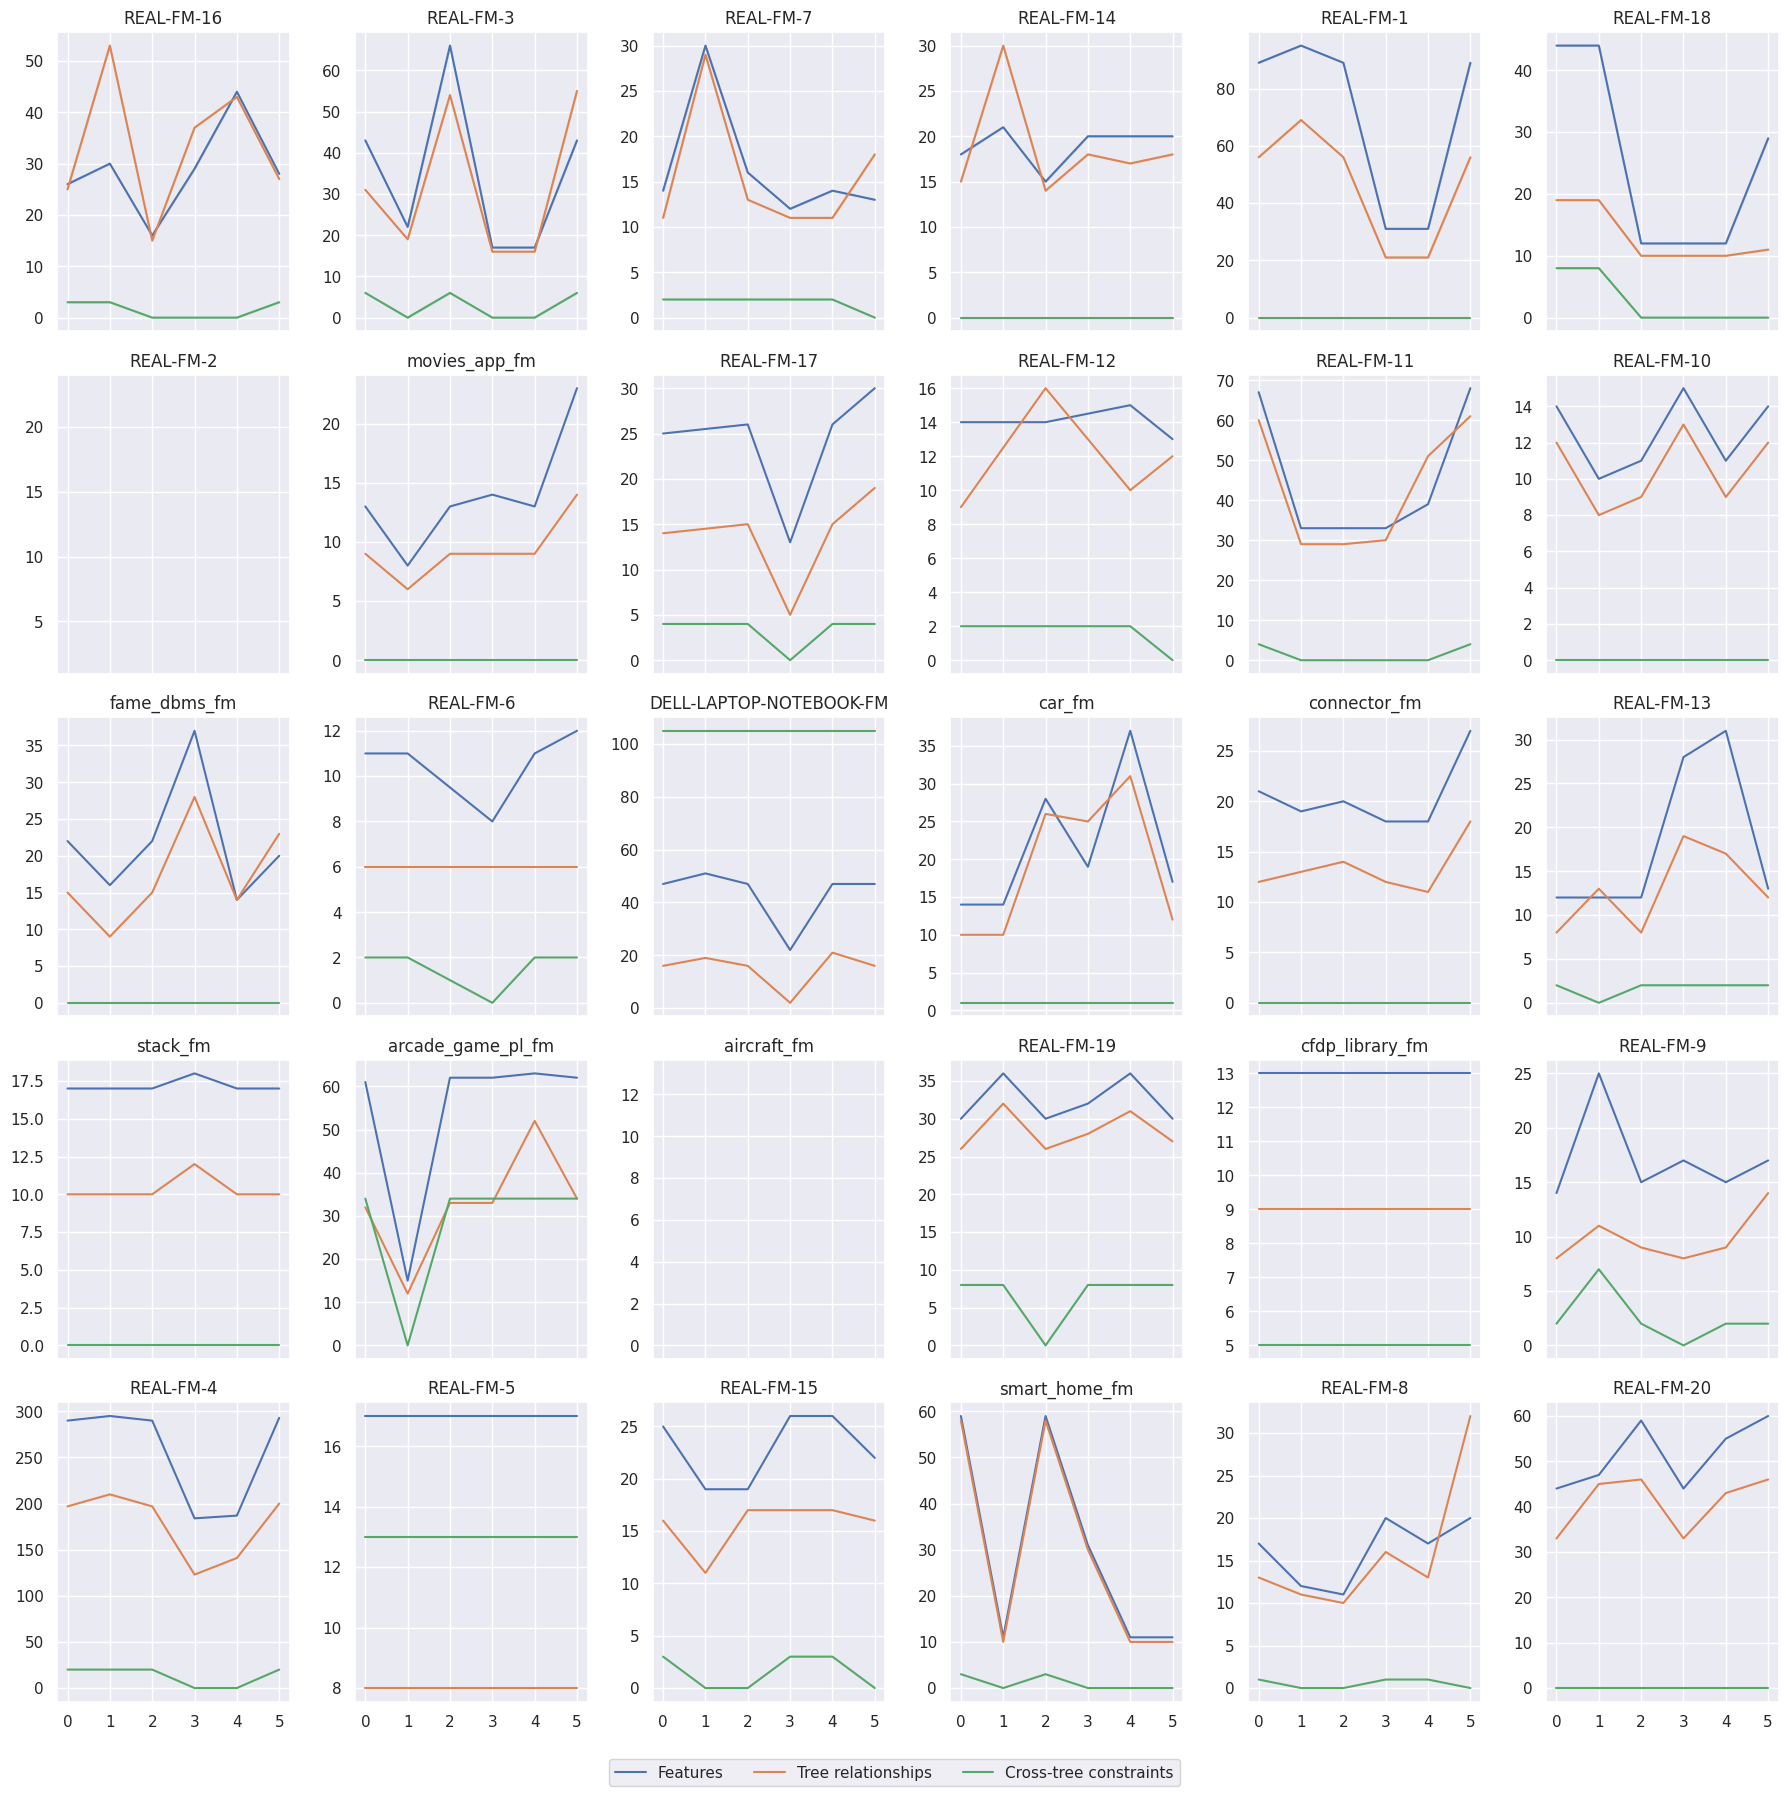

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

METRICS_CSV_FILE = "./SPLC23-LLM-artefact/3.results/analysis.csv"

sns.set()
fig, axes = plt.subplots(5, 6,figsize=(18,18),sharex=True)

features_data = pd.read_csv(METRICS_CSV_FILE, usecols=["modelName","iteration","property","value"])

features_data_f=features_data[(features_data["property"] == 'Features') | (features_data["property"] == 'Cross-tree constraints') | (features_data["property"] == "Tree relationships")]
features_data=features_data_f

uniques=features_data['modelName'].unique()
for i, ax in enumerate(axes.flat):
    ax.set_title(uniques[i].replace(".uvl",""))
    features_data_test=features_data[features_data["modelName"] == uniques[i]]
    sns.lineplot(features_data_test,x=features_data_test["iteration"], y=features_data_test["value"].astype(int),ax=ax,
                        hue=features_data_test["property"],
                        legend=True,sort=True)
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    ax.set_xticks(range(0,6), labels=range(0,6))
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.tight_layout()
fig.subplots_adjust(bottom=0.05)   ##  Need to play with this number.

fig.legend(handles, labels, loc='lower center',ncol=3)

plt.show()
#In case that you wnat to generate the figure
#plt.savefig("./semantics_structure"+'.pdf')
plt.clf()

#Now the third experiment: Domain analysis based on feature names

##We start by calling cohere and save the data. We provide the data already generated in the corresponding folder!

##This wont work with no API key!!

Install the cohere API

In [ ]:
!pip install cohere

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.8 MB/s eta 0:00:00


In [ ]:
from flamapy.core.discover import DiscoverMetamodels # This loads the tool in the python execution environment
import numpy as np

DIRECTORY_UVL_GENERATED = './SPLC23-LLM-artefact/2.inference/2.new_models/'
DIRECTORY_UVL_ORIGINAL = './SPLC23-LLM-artefact/1.model_selection/3.selected_models_in_uvl/'
RESULTS_DIRECTORY_COHERE = "./SPLC23-LLM-artefact/3.results/2.cohere"

co = cohere.Client() # This is your API key IMPORTANT. This wont work with no API key

def save_data(feature_string:str,destinationPath:str)->str:
    '''This calls coehre, and gets the embedings for each sentence'''
    if not os.path.isfile(destinationPath+".npy"):
        data=np.array(co.embed([feature_string]).embeddings)
        print(data)
        np.save(destinationPath, data)
        time.sleep(random.randint(20,60))
    return destinationPath

def save_features(model_file:str, destination_file_path:str)->str:
    '''This method is in charge of generate the file with the list of features for domain comparison'''
    discover_metamodel = DiscoverMetamodels()
    model=discover_metamodel.use_transformation_t2m(model_file,"fm")
    feature_string=""
    for feat in model.get_features():
        feature_string=feature_string+str(feat)+" "
    destination_file=open(destination_file_path+"_string",'w')
    print(feature_string[:-1],end="\r\n", file = destination_file)
    destination_file.close()
    return feature_string

for filename in os.listdir(DIRECTORY_UVL_ORIGINAL):
#Now the have to iterate over both the original UVL files and the generated ones.
  #We start generating the metrics for the original models
  originalFile = os.path.join(DIRECTORY_UVL,filename)
  if os.path.isfile(originalFile):
    cadena=save_features(originalFile,os.path.join(RESULTS_DIRECTORY_COHERE,"strings","0_"+filename))
    dataDestPath=save_data(cadena,os.path.join(RESULTS_DIRECTORY_COHERE,"data","0_"+filename+"_data"))
    #For each of the generated model
    for iteration in range(1,6):
      #We get the generated file
      moddedFile = os.path.join(DIRECTORY_UVL_GENERATED, str(iteration)+"_"+filename)
      #If exist
      if os.path.isfile(moddedFile):
        cadena=save_features(moddedFile,os.path.join(RESULTS_DIRECTORY_COHERE,"strings",str(iteration)+"_"+filename))
        dataDestPath=save_data(cadena,os.path.join(RESULTS_DIRECTORY_COHERE,"data",str(iteration)+"_"+filename+"_data"))

#Lets generate the plot within the paper

<Figure size 640x480 with 0 Axes>

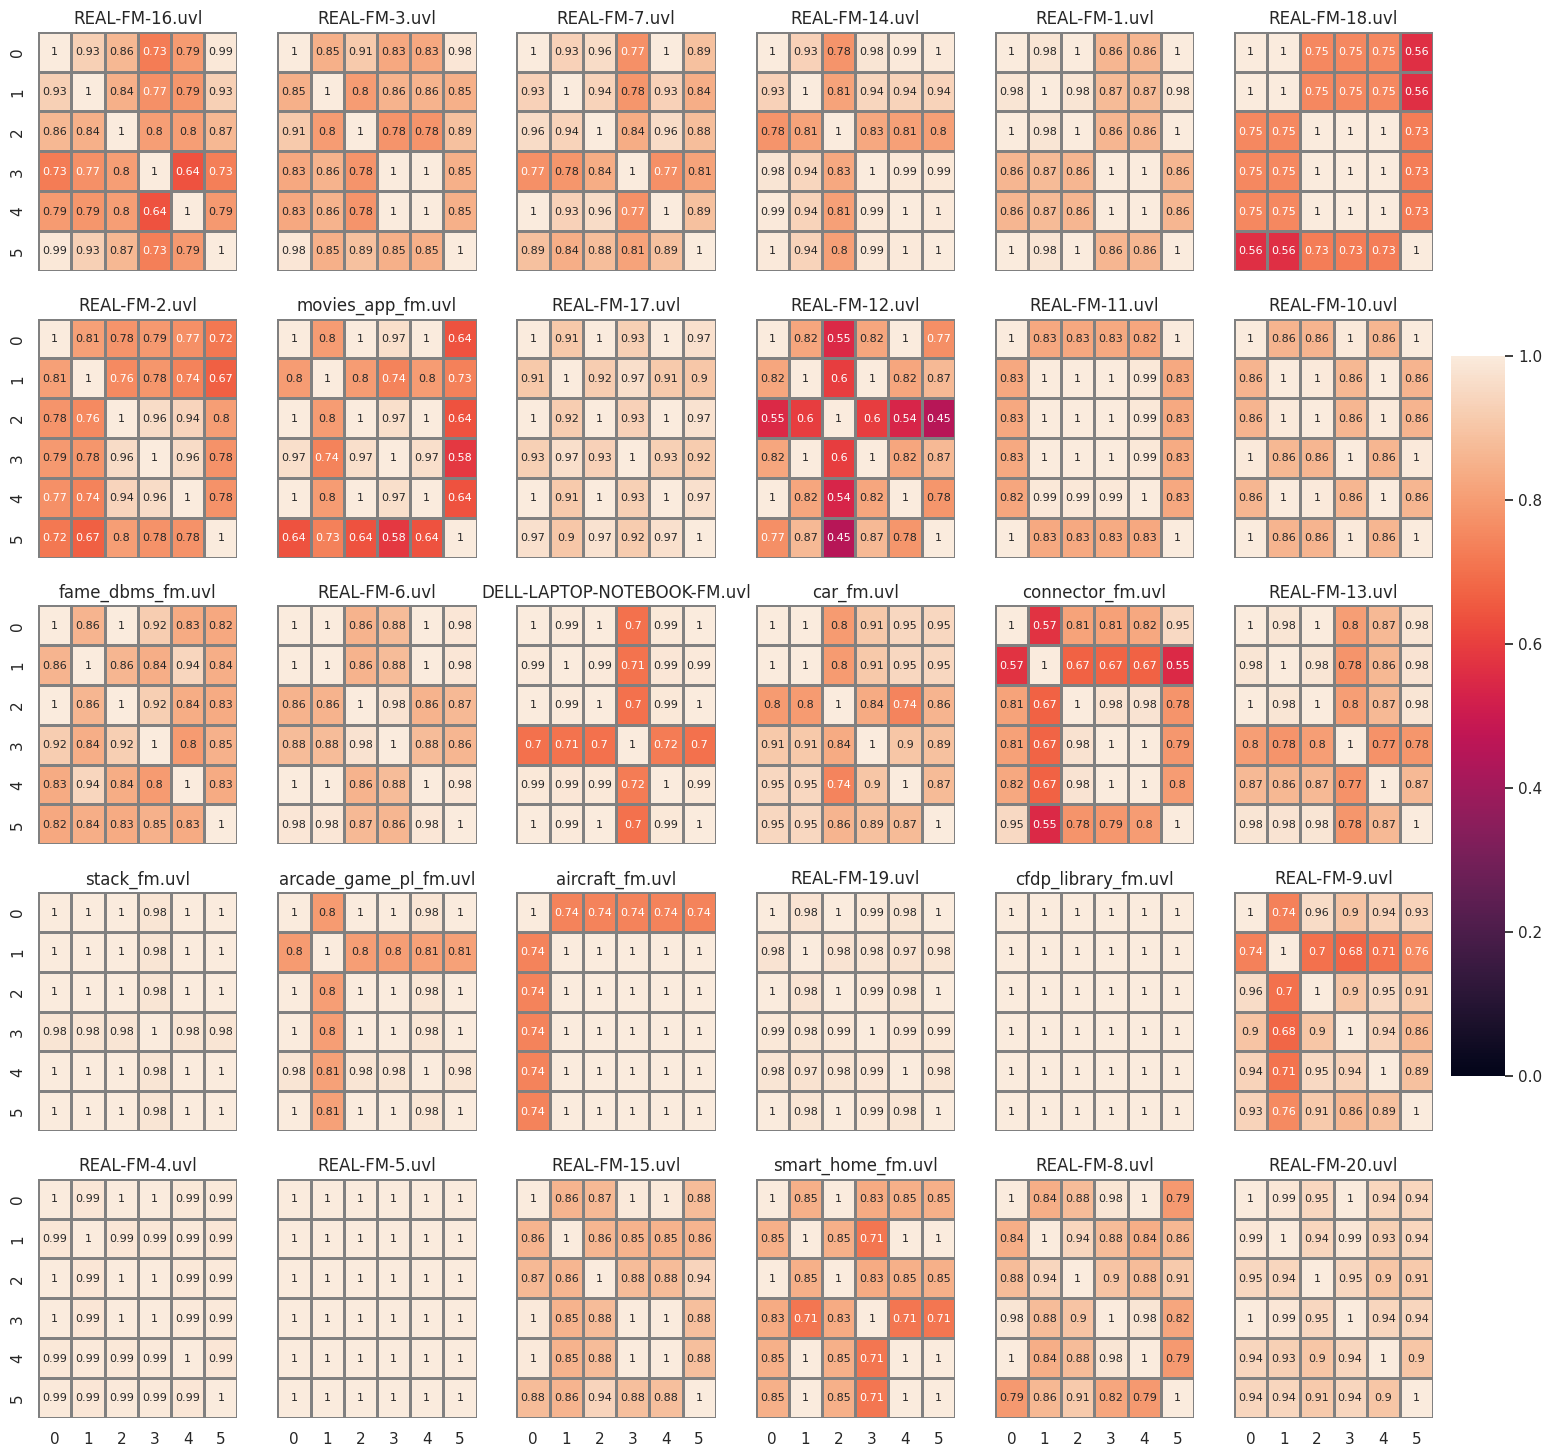

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot

import numpy as np
import altair as alt
import seaborn as sns
from matplotlib import pyplot as plt

RESULTS_DIRECTORY_COHERE = "./SPLC23-LLM-artefact/3.results/2.cohere"

def dot_analysis(sentence1:str,sentence2:str)->float:
    '''This method generates the dot differences in between sentences.'''
    sentence1_data=np.load(sentence1+".npy")
    sentence2_data=np.load(sentence2+".npy")
    return dot(sentence1_data[0], sentence2_data[0])

def dot_analysis_diagonal(sentence:str)->float:
    '''This method generates the dot differences in between sentences for the diagonal.'''
    sentence_data=np.load(sentence+".npy")
    return np.dot(sentence_data[0], sentence_data[0])

def cosin_analysis(sentence1:str,sentence2:str)->float:
    ''' This method generates the data to plot the similarities between sentences'''
    sentence1_data=np.load(sentence1+".npy")
    print(sentence1_data)
    sentence2_data=np.load(sentence2+".npy")
    print(sentence2_data)
    return cosine_similarity(sentence1_data, sentence2_data)[0][0]

def generate_similarity_plot(embeddings,x_labels,y_labels,title_label):
    dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
    ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,
                 linewidths=1, linecolor='grey',
                 xticklabels=x_labels,
                 yticklabels=y_labels,
                 annot=True,# cbar=False
    )
    fig=ax.get_figure()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    fig.suptitle(title_label)
    fig.savefig(RESULTS_DIRECTORY_COHERE+"/"+title_label+'.png')
    fig.clf()
    return dot_product_similarities

def generate_combined_plot(dot_product_similarities,x_labels,y_labels,titles):
    sns.set()
    fig, axes = plt.subplots(5, 6,figsize=(18,18),sharex=True, sharey=True)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    for i, ax in enumerate(axes.flat):
        ax.set_title(titles[i])
        sns.heatmap(dot_product_similarities[i], vmin=0, vmax=1,ax=ax,cbar=i == 0,
                        linewidths=1, linecolor='grey',
                        xticklabels=x_labels,
                        yticklabels=y_labels,
                        annot=True, annot_kws={"fontsize":8},cbar_ax=None if i else cbar_ax)
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    #fig.subplots_adjust(right=0.2)   ##  Need to play with this number.

    fig.savefig(RESULTS_DIRECTORY_COHERE+"/semantics_domain"+'.pdf')
    fig.show()
    #fig.clf()


#------------------------------------MAIN FUNCTION -------------
cosine_data=[]
titles=[]

for filename in os.listdir(DIRECTORY_UVL_ORIGINAL):
  allfiles=[]
  embedings={}
  titles.append(filename)

  #Now the have to iterate over both the original UVL files and the generated ones.
  #We start generating the metrics for the original models
  originalFile = os.path.join(DIRECTORY_UVL,filename)

  if os.path.isfile(originalFile):
    data_file_path=os.path.join(RESULTS_DIRECTORY_COHERE,"data","0_"+filename+"_data.npy")
    allfiles.append(data_file_path)
    embedings.update({"0":np.load(data_file_path)})
    #For each of the generated model
    for iteration in range(1,6):
      #We get the generated file
      moddedFile = os.path.join(DIRECTORY_UVL_GENERATED, str(iteration)+"_"+filename)
      #If exist
      if os.path.isfile(moddedFile):
        data_file_path=os.path.join(RESULTS_DIRECTORY_COHERE,"data",str(iteration)+"_"+filename+"_data.npy")
        allfiles.append(data_file_path)
        embedings.update({str(iteration):np.load(data_file_path)})
  #This generates a set of png file for indivudula models
  cosine_data.append(generate_similarity_plot(list(embedings.values()),list(embedings.keys()),list(embedings.keys()),filename))
#This generates the figure within the paper
generate_combined_plot(cosine_data,list(embedings.keys()),list(embedings.keys()),titles)


